In [1]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, '')

In [3]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [4]:
batch_size = 128
epochs = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [15]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 115 images belonging to 5 classes.
Found 38 images belonging to 5 classes.
Found 10 images belonging to 1 classes.


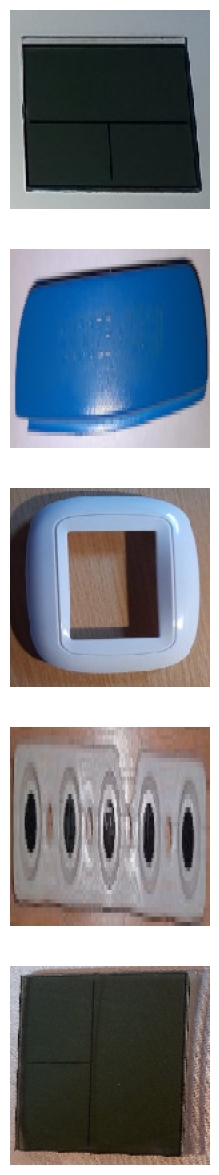

In [16]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 115 images belonging to 5 classes.


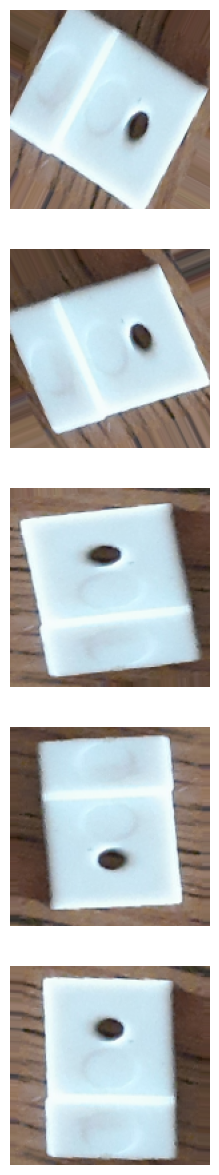

In [17]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [18]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 115 images belonging to 5 classes.


In [25]:
model = Sequential()
model.add(Conv2D(64, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(4,4))
model.add(Flatten())
model.add(Dense(64, input_dim=784))
model.add(Dense(32, input_dim=784))
model.add(Dropout(.2))
model.add(Dense(5, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      6976      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 87616)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                5607488   
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                      

In [26]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [27]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/64
1/1 [==============================] - 2s 2s/step - loss: 1.6668 - accuracy: 0.1478 - val_loss: 23.6822 - val_accuracy: 0.2105
Epoch 2/64
1/1 [==============================] - 1s 1s/step - loss: 23.1039 - accuracy: 0.2261 - val_loss: 8.4192 - val_accuracy: 0.2368
Epoch 3/64
1/1 [==============================] - 1s 1s/step - loss: 8.4826 - accuracy: 0.3043 - val_loss: 9.2752 - val_accuracy: 0.3158
Epoch 4/64
1/1 [==============================] - 1s 1s/step - loss: 11.0439 - accuracy: 0.3130 - val_loss: 6.2955 - val_accuracy: 0.2632
Epoch 5/64
1/1 [==============================] - 1s 1s/step - loss: 7.1530 - accuracy: 0.3304 - val_loss: 1.7971 - val_accuracy: 0.5263
Epoch 6/64
1/1 [==============================] - 1s 1s/step - loss: 2.1258 - accuracy: 0.4870 - val_loss: 0.8095 - val_accuracy: 0.6842
Epoch 7/64
1/1 [==============================] - 1s 1s/step - loss: 0.9080 - accuracy: 0.6435 - val_loss: 1.0707 - val_accuracy: 0.5789
Epoch 8/64
1/1 [======================

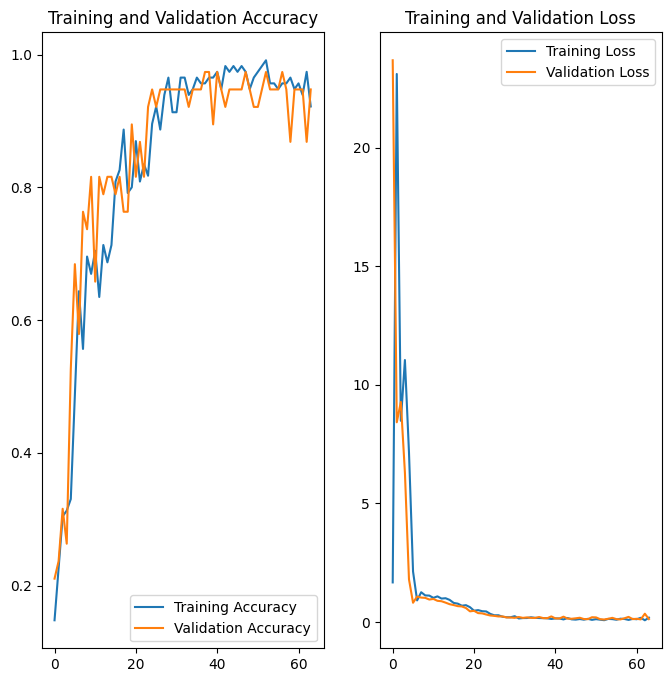

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
#save model

model.save('./saved_model/92_percent_dark')

INFO:tensorflow:Assets written to: ./saved_model/92_percent_dark\assets


INFO:tensorflow:Assets written to: ./saved_model/92_percent_dark\assets


1/1 [==============================] - 0s 80ms/step


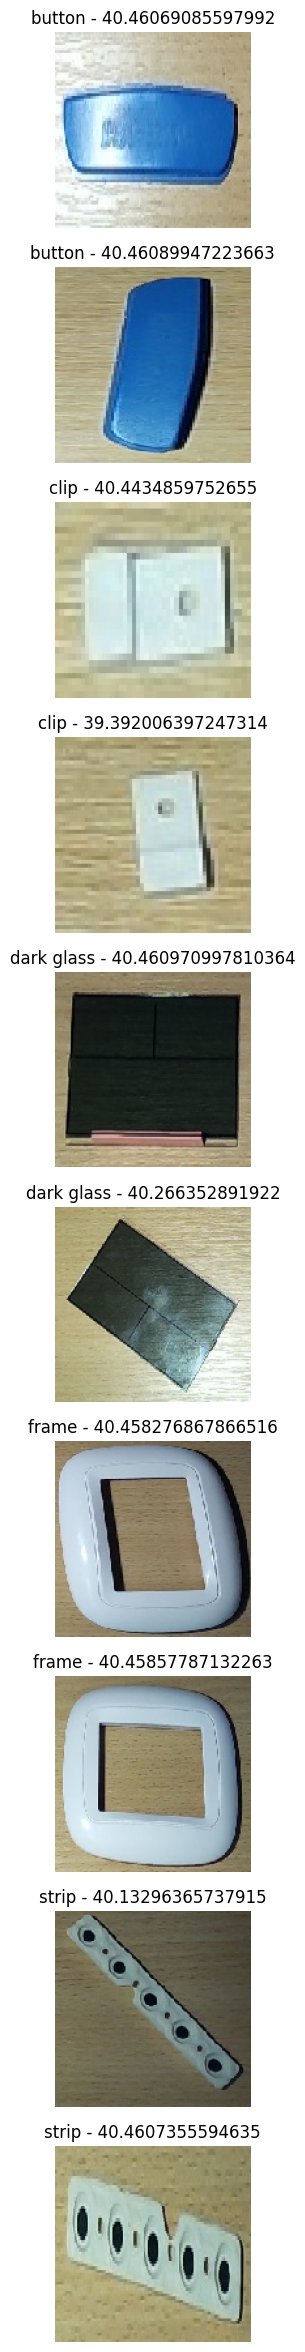

In [29]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)

predictionPercent = []
predictionLabel = []
name = ["clip", "dark glass", "frame", "strip", "button"]
for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(name[category])

plotImages(test_images, predictionPercent, predictionLabel)
